# 1-D dynamical systems in neuroscience

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from cycler import cycler
import seaborn as sns

palette = sns.color_palette("Set2")
plt.rc('axes', prop_cycle=cycler(color=palette))
plt.style.use(['science', 'grid', 'custom'])

## I-V relations and dynamics analysis

Consider a simplified version of the Hodgkin-Huxley model where we describe the voltage dynamics ($V$) and gating dynamics ($p$). We can reduce this system to one-dimension by **assuming the gating process is instantaneous**. For easy comparison we also consider a system without gating dynamics, i.e. $m_{\infty}(V) = 1$
<br>
<br>

### M1 model neuron with no gating dynamics
here we consider the singular leak model of an RC neuron
<br>
$$I(V) = C \frac{dV}{dt} = I - g_{L}(V - E_{L})$$
<br>

### M2 model neuron with gating dynamics
here we consider the persistent sodium model with instantaneous current $I_{Na,p} $
<br>
$$I(V) = C \frac{dV}{dt} = I - g_{L}(V - E_{L}) -g_{Na}m_{\infty}(V)(V - E_{Na})$$  
<br>

where the gating variable $m$ is modelled as
<br>
$$m_{\infty}(V) = \frac{1}{1 + \exp{(\frac{V_{1/2} - V}{k}})}$$

In [3]:
# defining biophysical neuron parameters based on experimental values obtained from layer 5 pyramidL cells in a rats visual cortex (p. 56)

C = 10 #uF
I = 0 #pA

g_L = 19 #mS
E_L = -67 #mV

g_Na = 74 #mS
E_Na = 60 #mV
V_half = 1.5 #mV

k = 16 #mV

In [4]:
# defining boltzmann function

def boltzmann(V, V_half, k):
    return 1/(1 + np.exp((V_half - V)/k))


Here we consider $F(V) = \dot{V} = \frac{-I(V)}{C}$

In [5]:
V = np.linspace(-100, 50, 1000)

# no gating dynamics
def I1(V, I_ext):
    I_Leak = g_L*(V - E_L)
    return I_ext - I_Leak

def F1(V, I_ext):
    return I1(V, I_ext)/C

# with gating dynamics
def I2(V, I_ext):
    I_Leak = g_L*(V - E_L)
    I_Na = g_Na*(V - E_Na)
    m_inf = boltzmann(V, V_half, k)
    return I_ext - (I_Leak + I_Na*m_inf)

def F2(V, I_ext):
    return I2(V, I_ext)/C
    

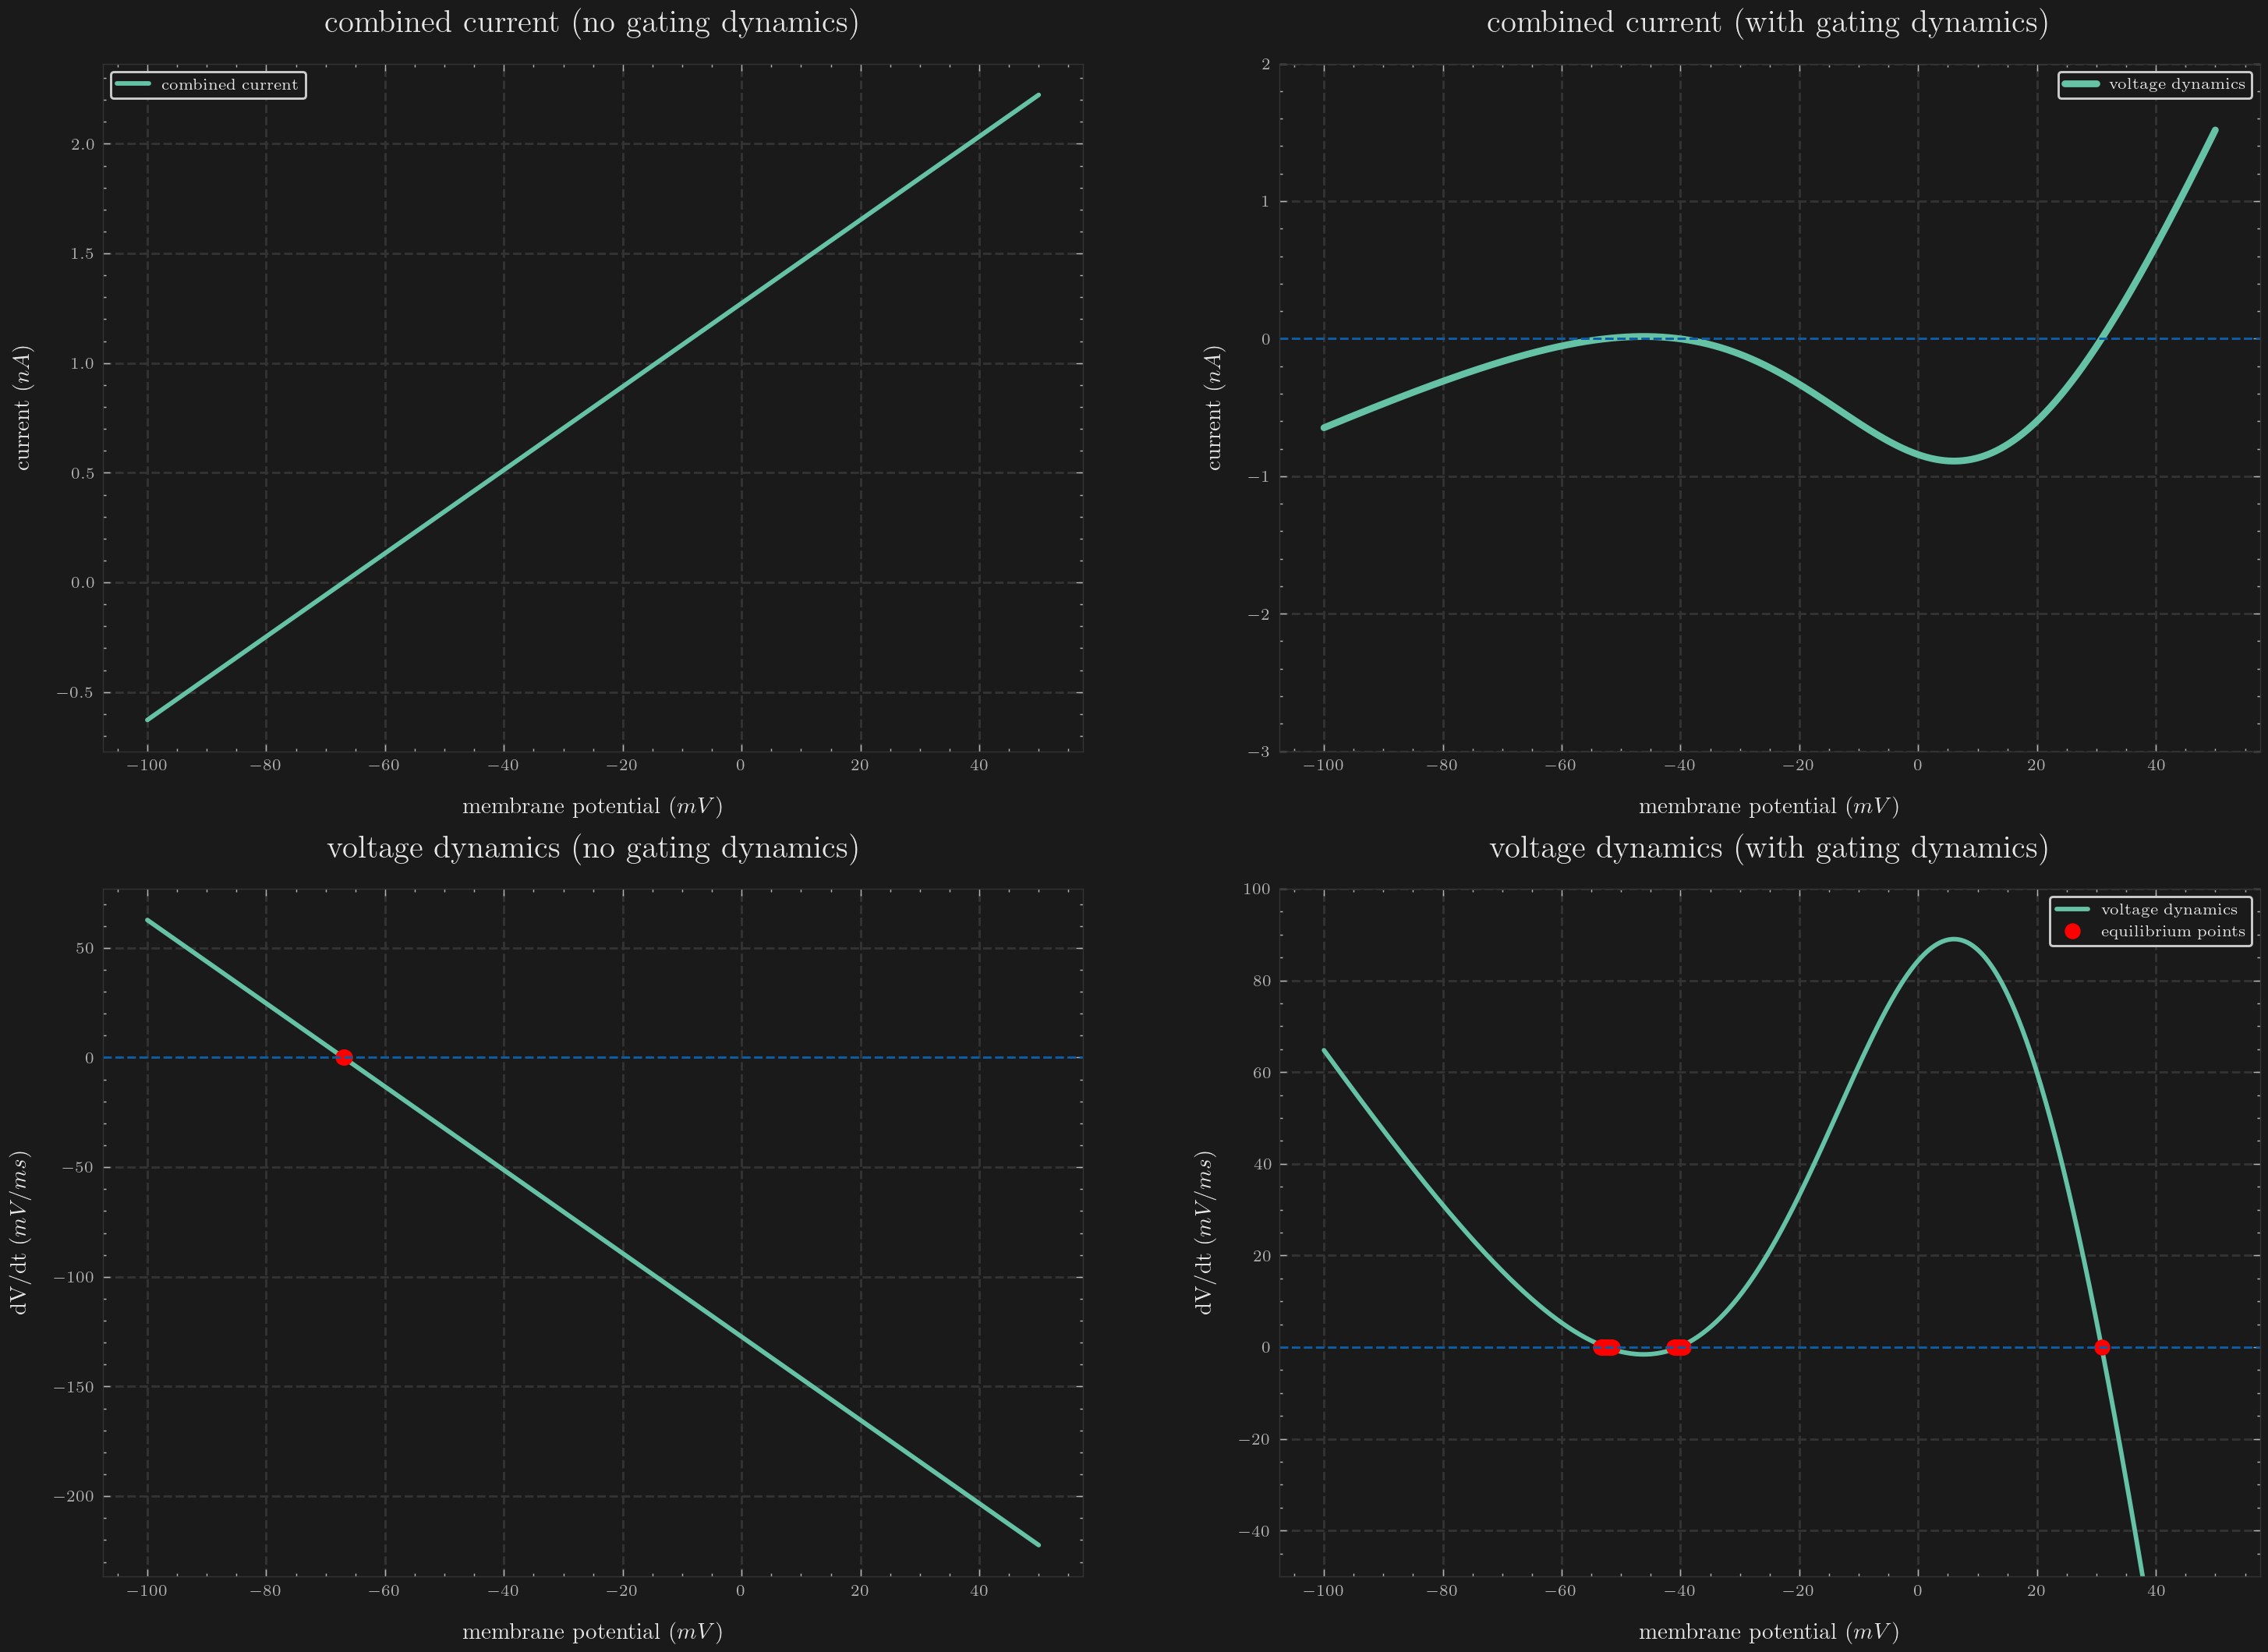

<Figure size 1152x864 with 0 Axes>

In [6]:
I_ext = 0

tolerance = 0.5
equilibrium_indices1 = np.where(np.abs(F1(V, I_ext)) < tolerance)[0]
equilibrium_points1 = V[equilibrium_indices1]
equilibrium_indices2 = np.where(np.abs(F2(V, I_ext)) < tolerance)[0]
equilibrium_points2 = V[equilibrium_indices2]

fig1, ax1 = plt.subplots(2,2,figsize=(17,12), dpi = 210)

for row in ax1:
    for ax in row:
        ax.set_prop_cycle(cycler(color=palette))

ax1[0,0].plot(V, -I1(V, I_ext)/1000, label = 'combined current', linewidth = 2)
ax1[0,0].set_ylabel('current ($nA$)')
ax1[0,0].set_xlabel('membrane potential ($mV$)')
ax1[0,0].set_title('combined current (no gating dynamics)')
ax1[0,0].legend()

ax1[0,1].plot(V, -I2(V, I_ext)/1000, label = 'voltage dynamics', linewidth = 3)
ax1[0,1].axhline(0, linestyle = '--')
ax1[0,1].set_ylabel('current ($nA$)')
ax1[0,1].set_xlabel('membrane potential ($mV$)')
ax1[0,1].set_ylim(-3, 2)
ax1[0,1].set_title('combined current (with gating dynamics)')
ax1[0,1].legend()

ax1[1,0].plot(V, F1(V, I_ext), label = 'voltage dynamics', linewidth = 2)
ax1[1,0].plot(equilibrium_points1, np.zeros_like(equilibrium_points1), 'ro', label='equilibrium points')
ax1[1,0].axhline(0, linestyle = '--')
ax1[1,0].set_ylabel('dV/dt ($mV/ms$)')
ax1[1,0].set_xlabel('membrane potential ($mV$)')
ax1[1,0].set_title('voltage dynamics (no gating dynamics)')

ax1[1,1].plot(V, F2(V, I_ext), label = 'voltage dynamics', linewidth = 2)
ax1[1,1].plot(equilibrium_points2, np.zeros_like(equilibrium_points2), 'ro', label='equilibrium points')
ax1[1,1].axhline(0, linestyle = '--')
ax1[1,1].set_ylabel('dV/dt ($mV/ms$)')
ax1[1,1].set_xlabel('membrane potential ($mV$)')
ax1[1,1].set_ylim(-50, 100)
ax1[1,1].set_title('voltage dynamics (with gating dynamics)')

plt.legend()
plt.show()
plt.clf()
plt.tight_layout()

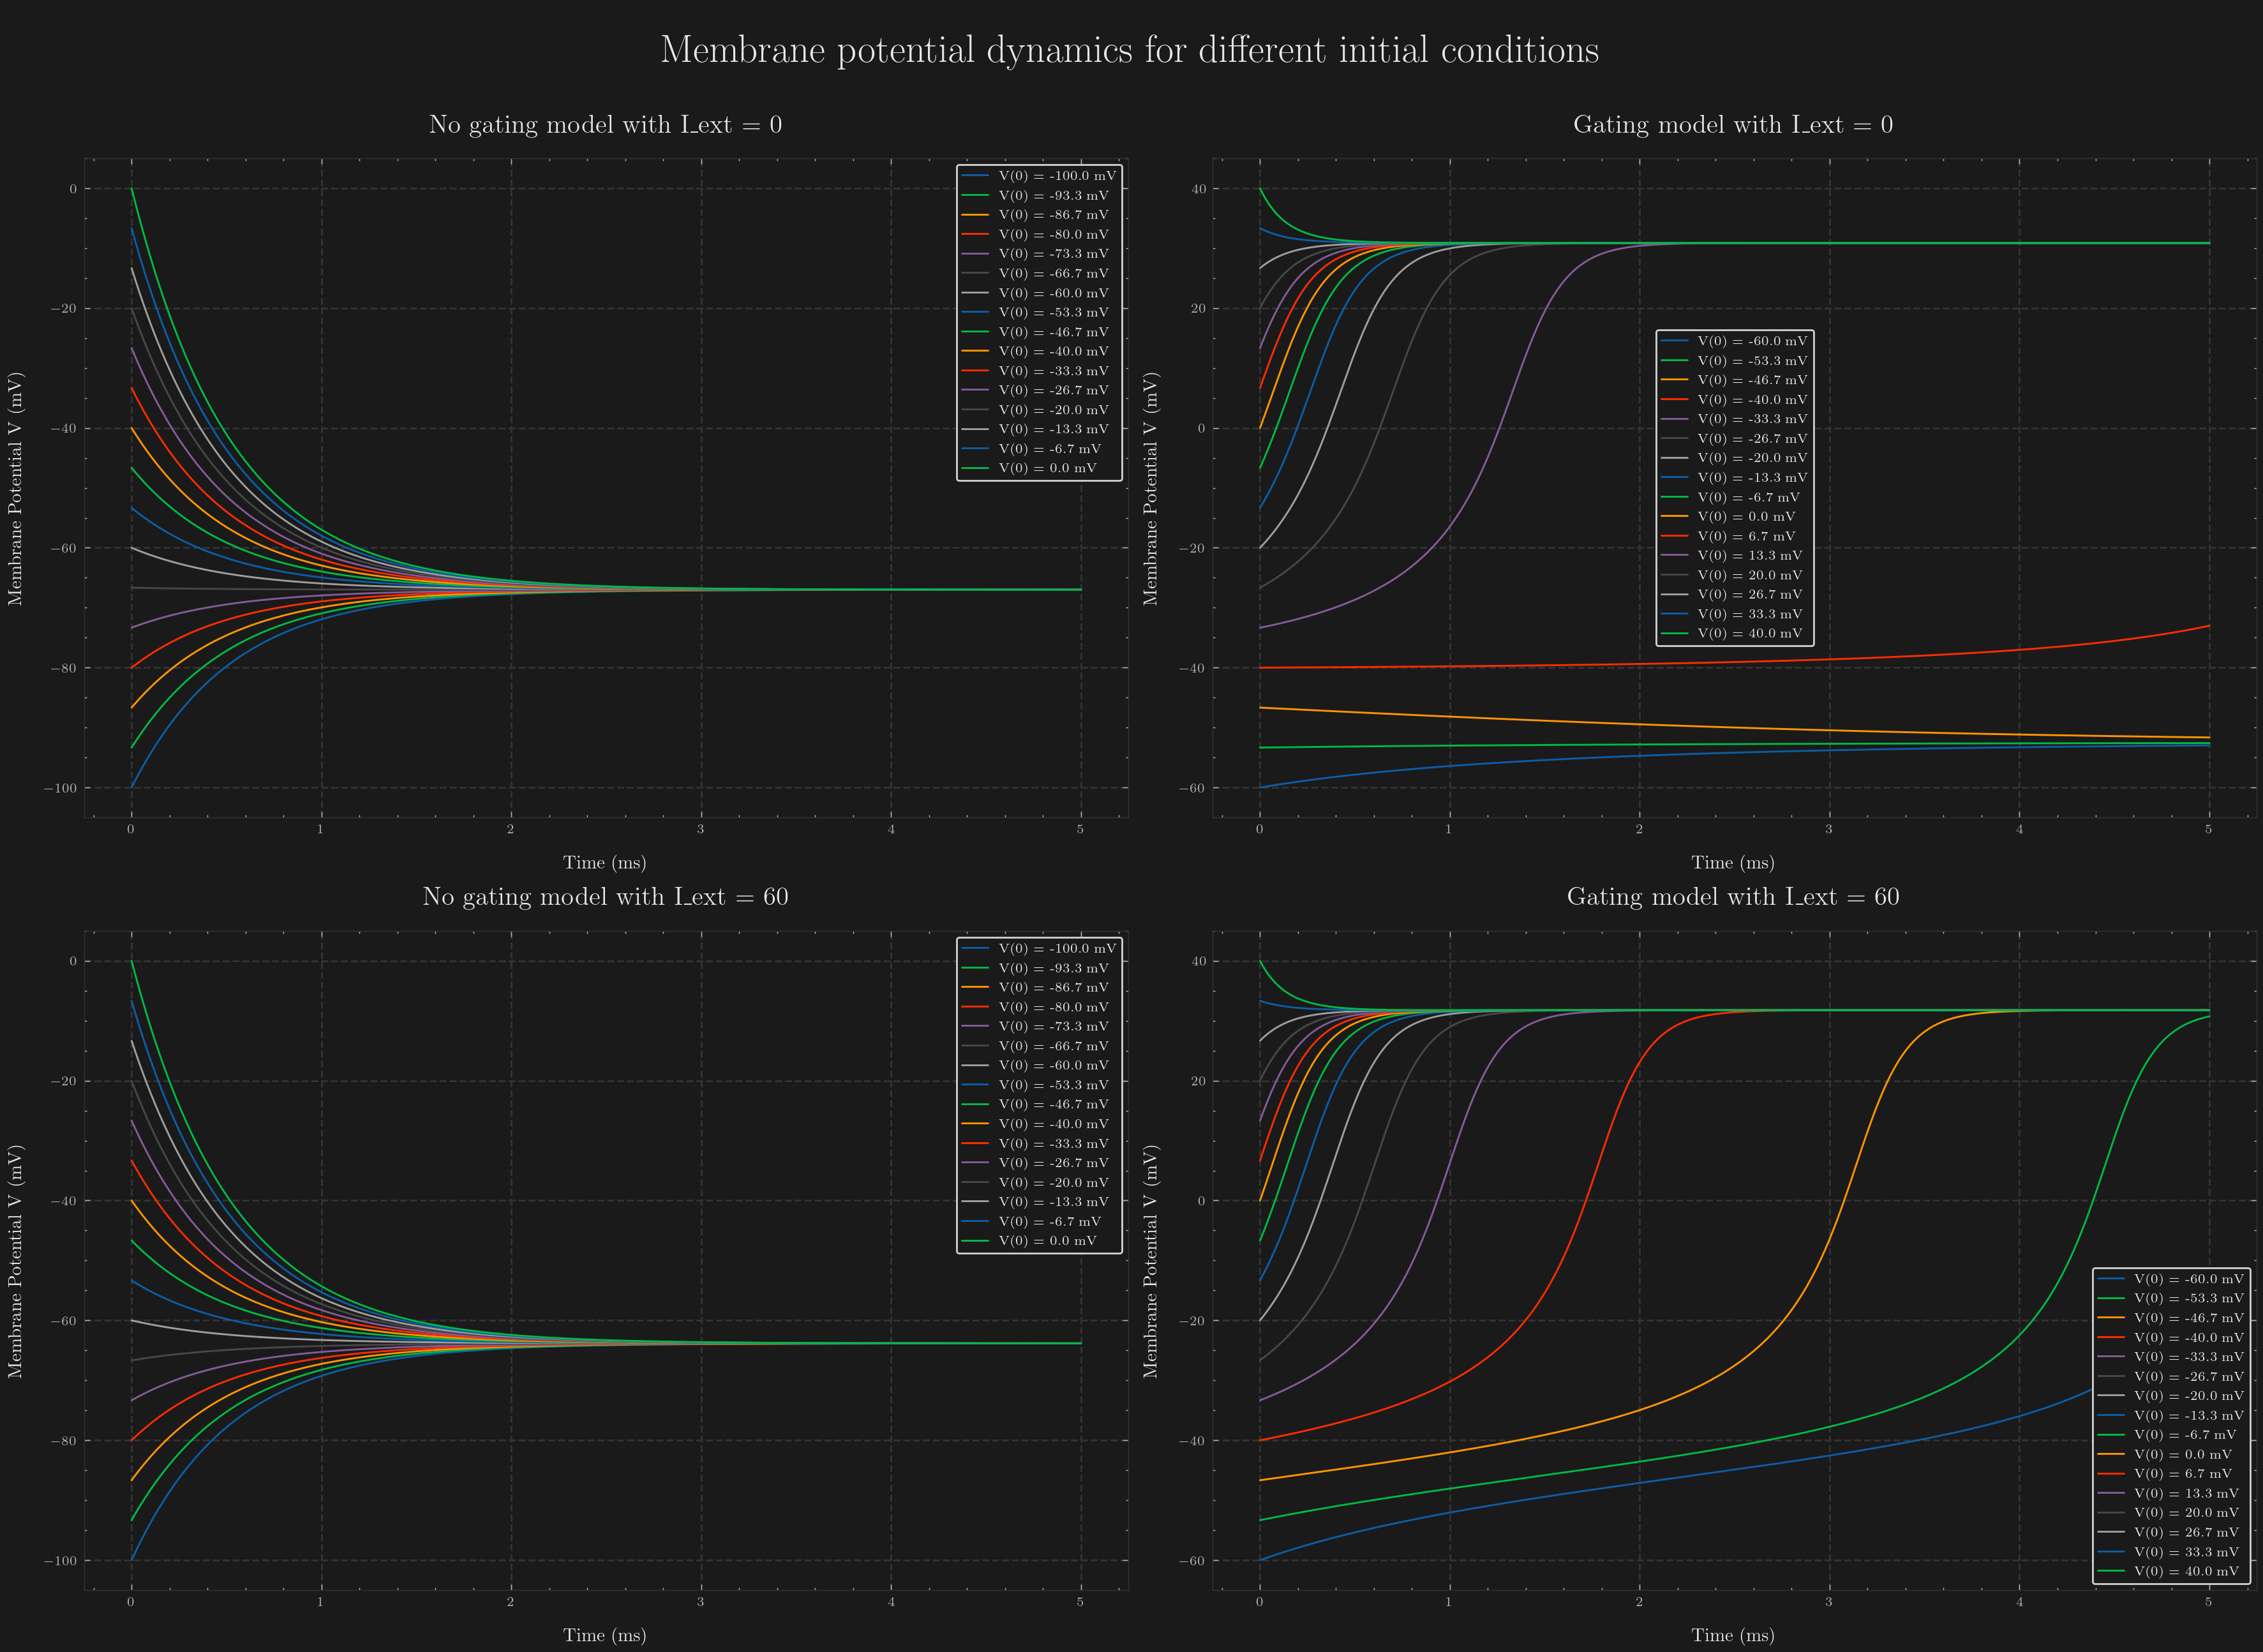

In [7]:
from scipy.integrate import odeint

# define the ODE dV/dt = -I(V)
def dV1_dt(V, t, I_external):
    return I1(V, I_external)/C

def dV2_dt(V, t, I_external):
    return I2(V, I_external)/C

# time points to solve the ODE
t = np.linspace(0, 5, 500)

# initial conditions: 16 values 
initial_conditions1 = np.linspace(-100, 0, 16)
initial_conditions2 = np.linspace(-60, 40, 16)

# Create subplots
fig2, ax2 = plt.subplots(2, 2, figsize=(17, 12), dpi = 210)

# plot for simple system with I_external = 0
for V0 in initial_conditions1:
    V_t = odeint(dV1_dt, V0, t, args=(0,))  # I_external = 0
    ax2[0,0].plot(t, V_t, label=f'V(0) = {V0:.1f} mV')

ax2[0,0].set_title('No gating model with I_ext = 0')
ax2[0,0].set_xlabel('Time (ms)')
ax2[0,0].set_ylabel('Membrane Potential V (mV)')
ax2[0,0].grid(True)

# plot for simple system with I_external = 60
for V0 in initial_conditions1:
    V_t = odeint(dV1_dt, V0, t, args=(60,))  # I_external = 60
    ax2[1,0].plot(t, V_t, label=f'V(0) = {V0:.1f} mV')

ax2[1,0].set_title('No gating model with I_ext = 60')
ax2[1,0].set_xlabel('Time (ms)')
ax2[1,0].set_ylabel('Membrane Potential V (mV)')
ax2[1,0].grid(True)

# plot for gating system with I_ext = 0

for V0 in initial_conditions2:
    V_t = odeint(dV2_dt, V0, t, args=(0,))
    ax2[0,1].plot(t, V_t, label=f'V(0) = {V0:.1f} mV')

ax2[0,1].set_title('Gating model with I_ext = 0')
ax2[0,1].set_xlabel('Time (ms)')
ax2[0,1].set_ylabel('Membrane Potential V (mV)')
ax2[0,1].grid(True)

# plot for gating system with I_ext = 60
for V0 in initial_conditions2:
    V_t = odeint(dV2_dt, V0, t, args=(60,))
    ax2[1,1].plot(t, V_t, label=f'V(0) = {V0:.1f} mV')

ax2[1,1].set_title('Gating model with I_ext = 60')
ax2[1,1].set_xlabel('Time (ms)')
ax2[1,1].set_ylabel('Membrane Potential V (mV)')
ax2[1,1].grid(True)

# Add legends and adjust layout
for row in ax2:
    for ax in row:
        ax.legend()

plt.figtext(0.5, 1.02, ' ', fontsize=10)
plt.suptitle('Membrane potential dynamics for different initial conditions', fontsize=21, y=1.01)
plt.tight_layout()
plt.show()

## phase portraits

In computational neuroscience one is often faced with complicated systems describing complex neuronal dynamics, as useful strategy is to replace such systems with topologically equivalent phase portraits.

For example $\dot{V} = V - V^{3}$ is topologically equivalent to the figures describe in fig 3.19

Text(0.5, 0, '$V_{m}$')

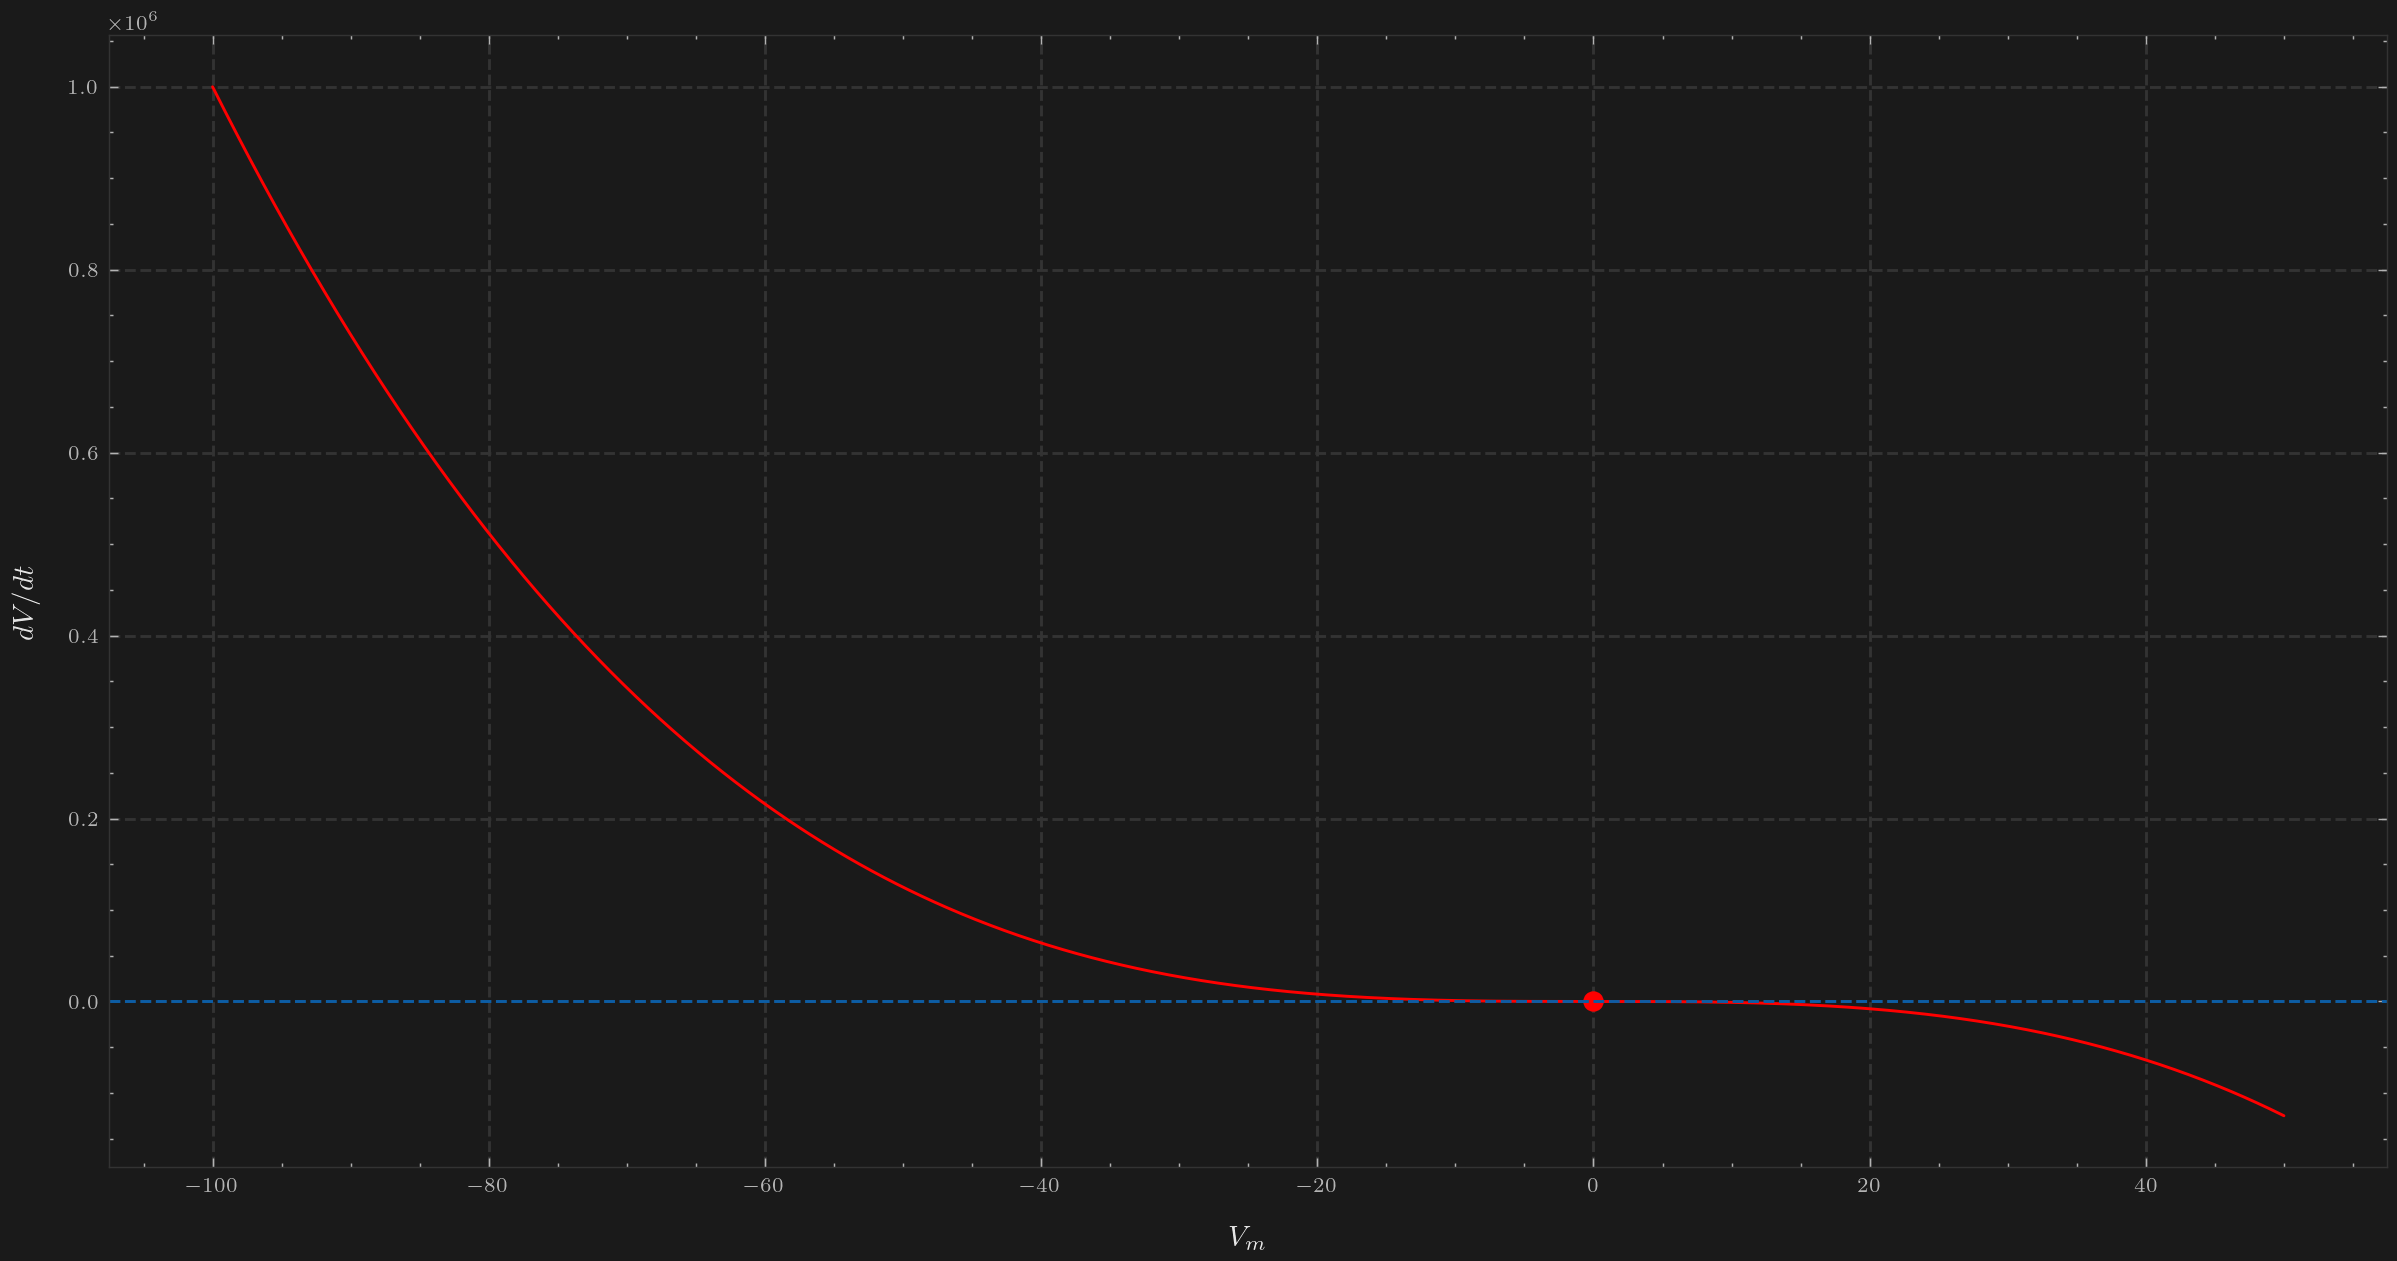

In [8]:
# verification of topological claim

def F3():
    return V - V**3

equilibrium_indices3 = np.argwhere(np.abs(F3()) < 0.01).flatten()
equilibrium_points3 = V[equilibrium_indices3]

plt.figure(figsize=(14, 7), dpi = 210)
plt.plot(V, F3(), color = 'red')
plt.plot(equilibrium_points3, np.zeros_like(equilibrium_points3), 'ro')
plt.axhline(0, linestyle = '--')
plt.ylabel('$dV/dt$')
plt.xlabel('$V_{m}$')

## bifurcations

when the system is at equilibrium AND the derivative of the system $F'(V) = \lambda = 0$ the behaviour cannot be analysed in the same way as hyperbolic fixed points ($\lambda \neq 0$) and we must consider the bifurcation diagram


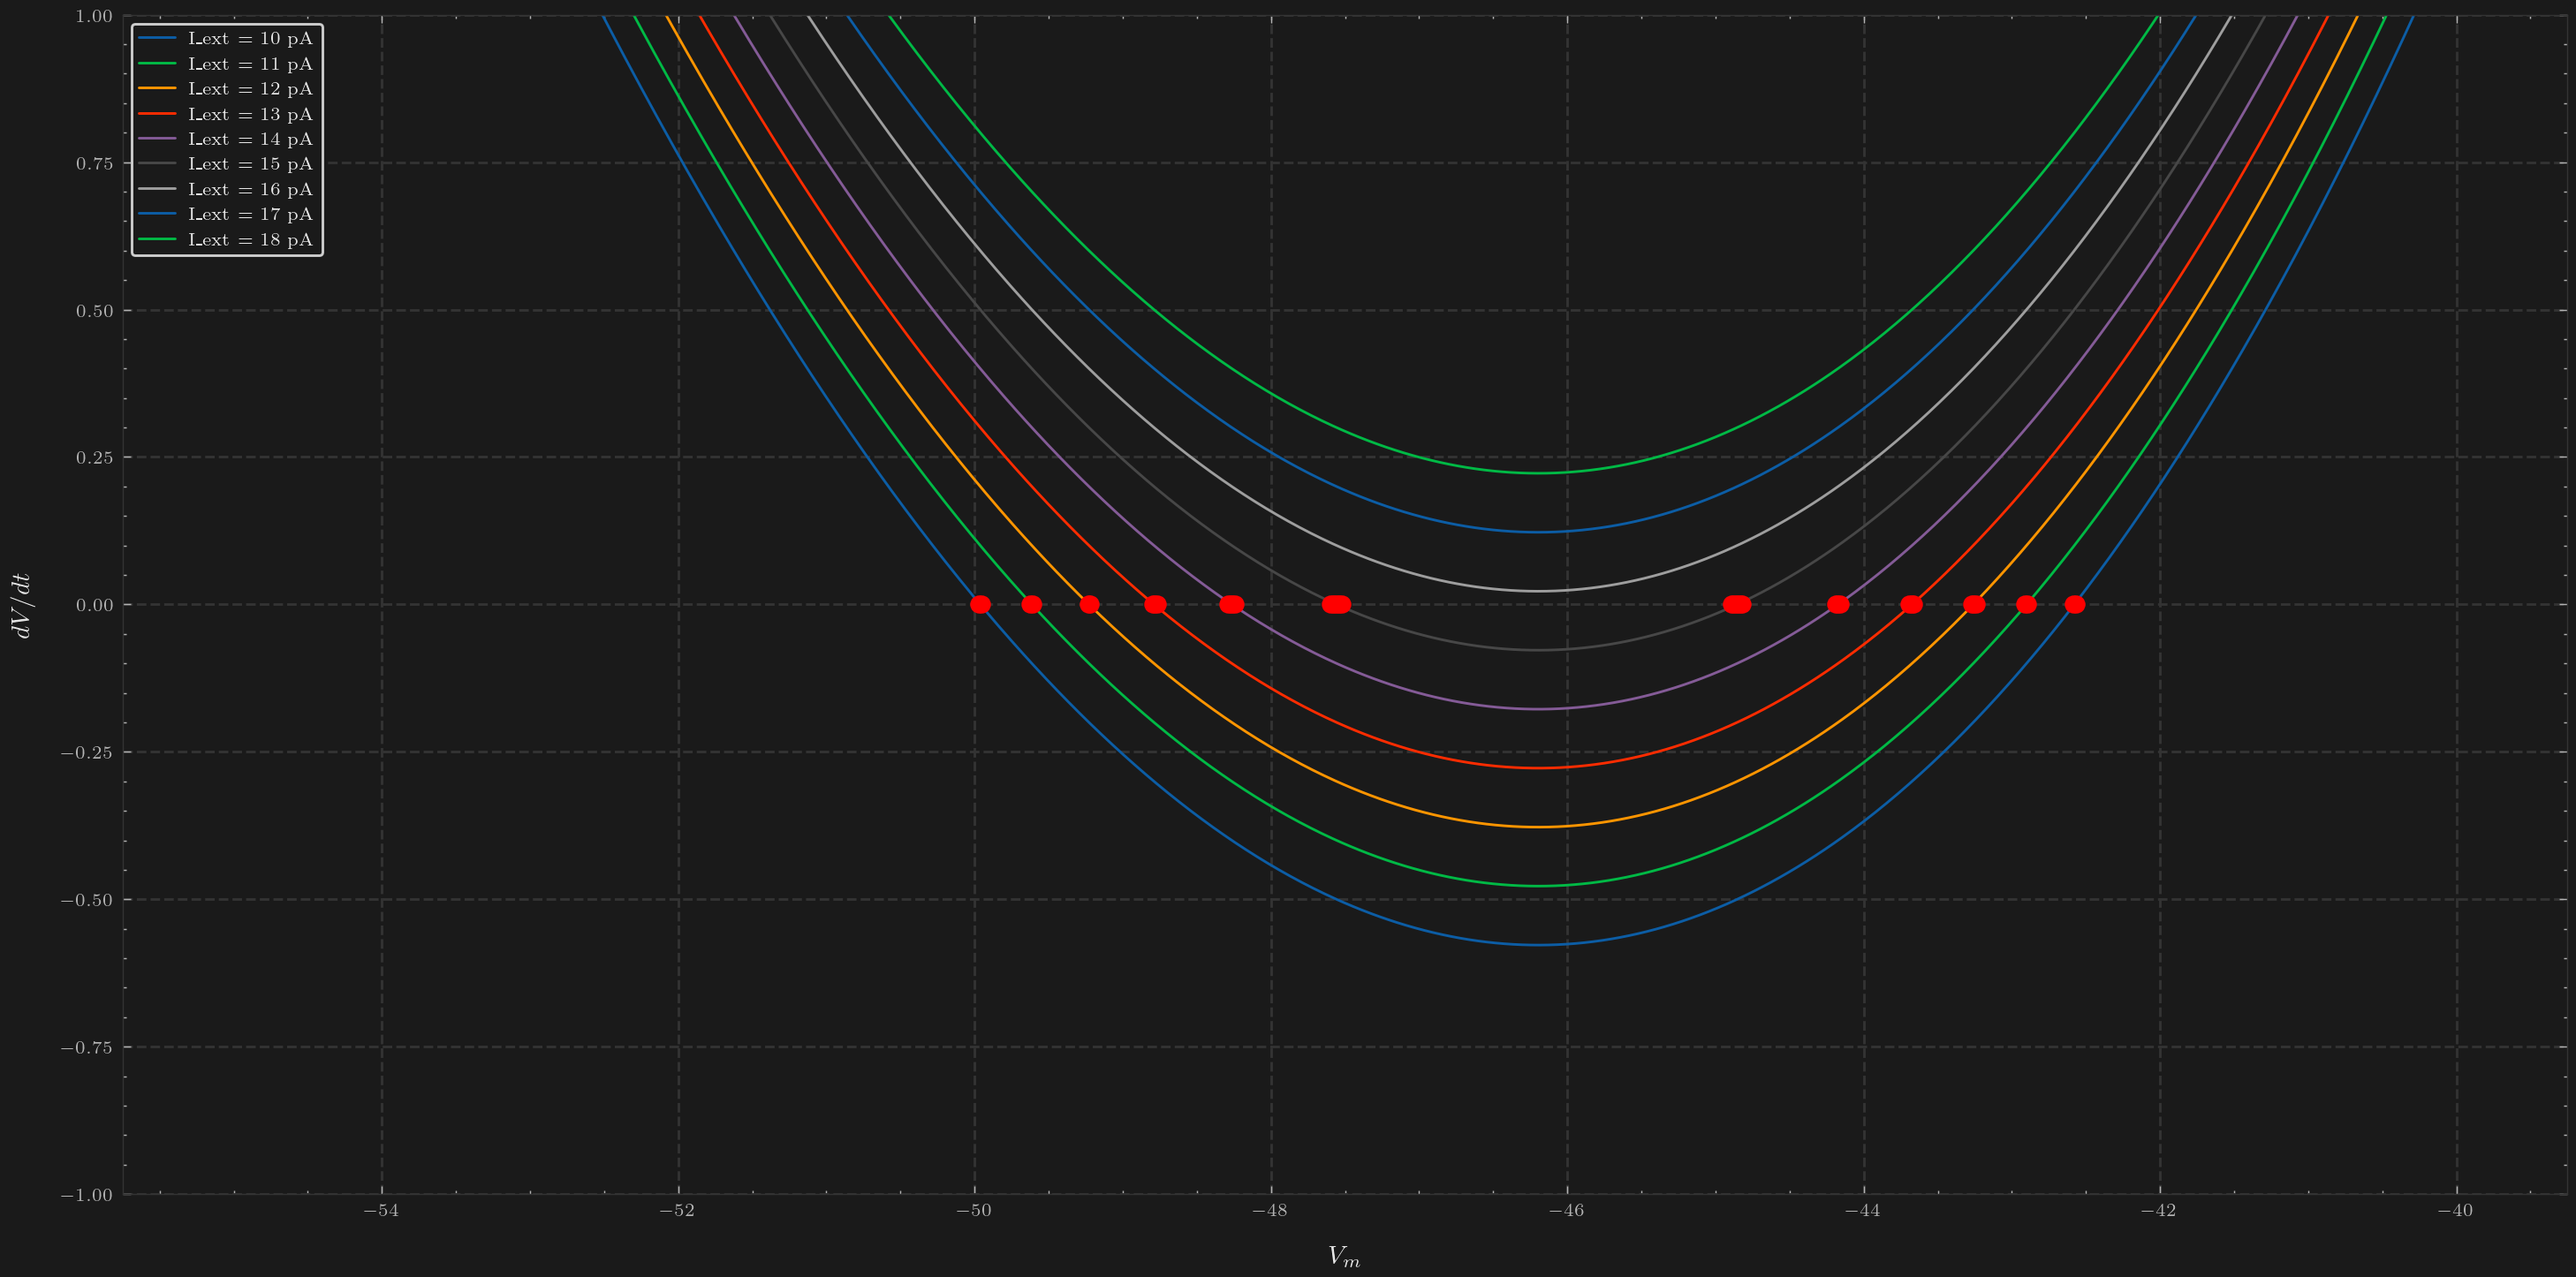

In [9]:
def F(V, I_external):
    return I2(V, I_external)/C

V = np.linspace(-55, -40, 1000)

plt.figure(figsize=(14, 7), dpi = 210)
for current in range(10, 19):
    plt.plot(V, F(V, current), label=f'I_ext = {current} pA')
    equilibrium_indices = np.argwhere(np.abs(F(V, current)) < 0.005).flatten()
    equilibrium_points = V[equilibrium_indices]
    plt.plot(equilibrium_points, np.zeros_like(equilibrium_points), 'ro')
plt.ylabel('$dV/dt$')
plt.ylim(-1, 1)
plt.xlabel('$V_{m}$')
plt.legend()
plt.tight_layout()
plt.show()

### slow transitions around bifurcation paramater

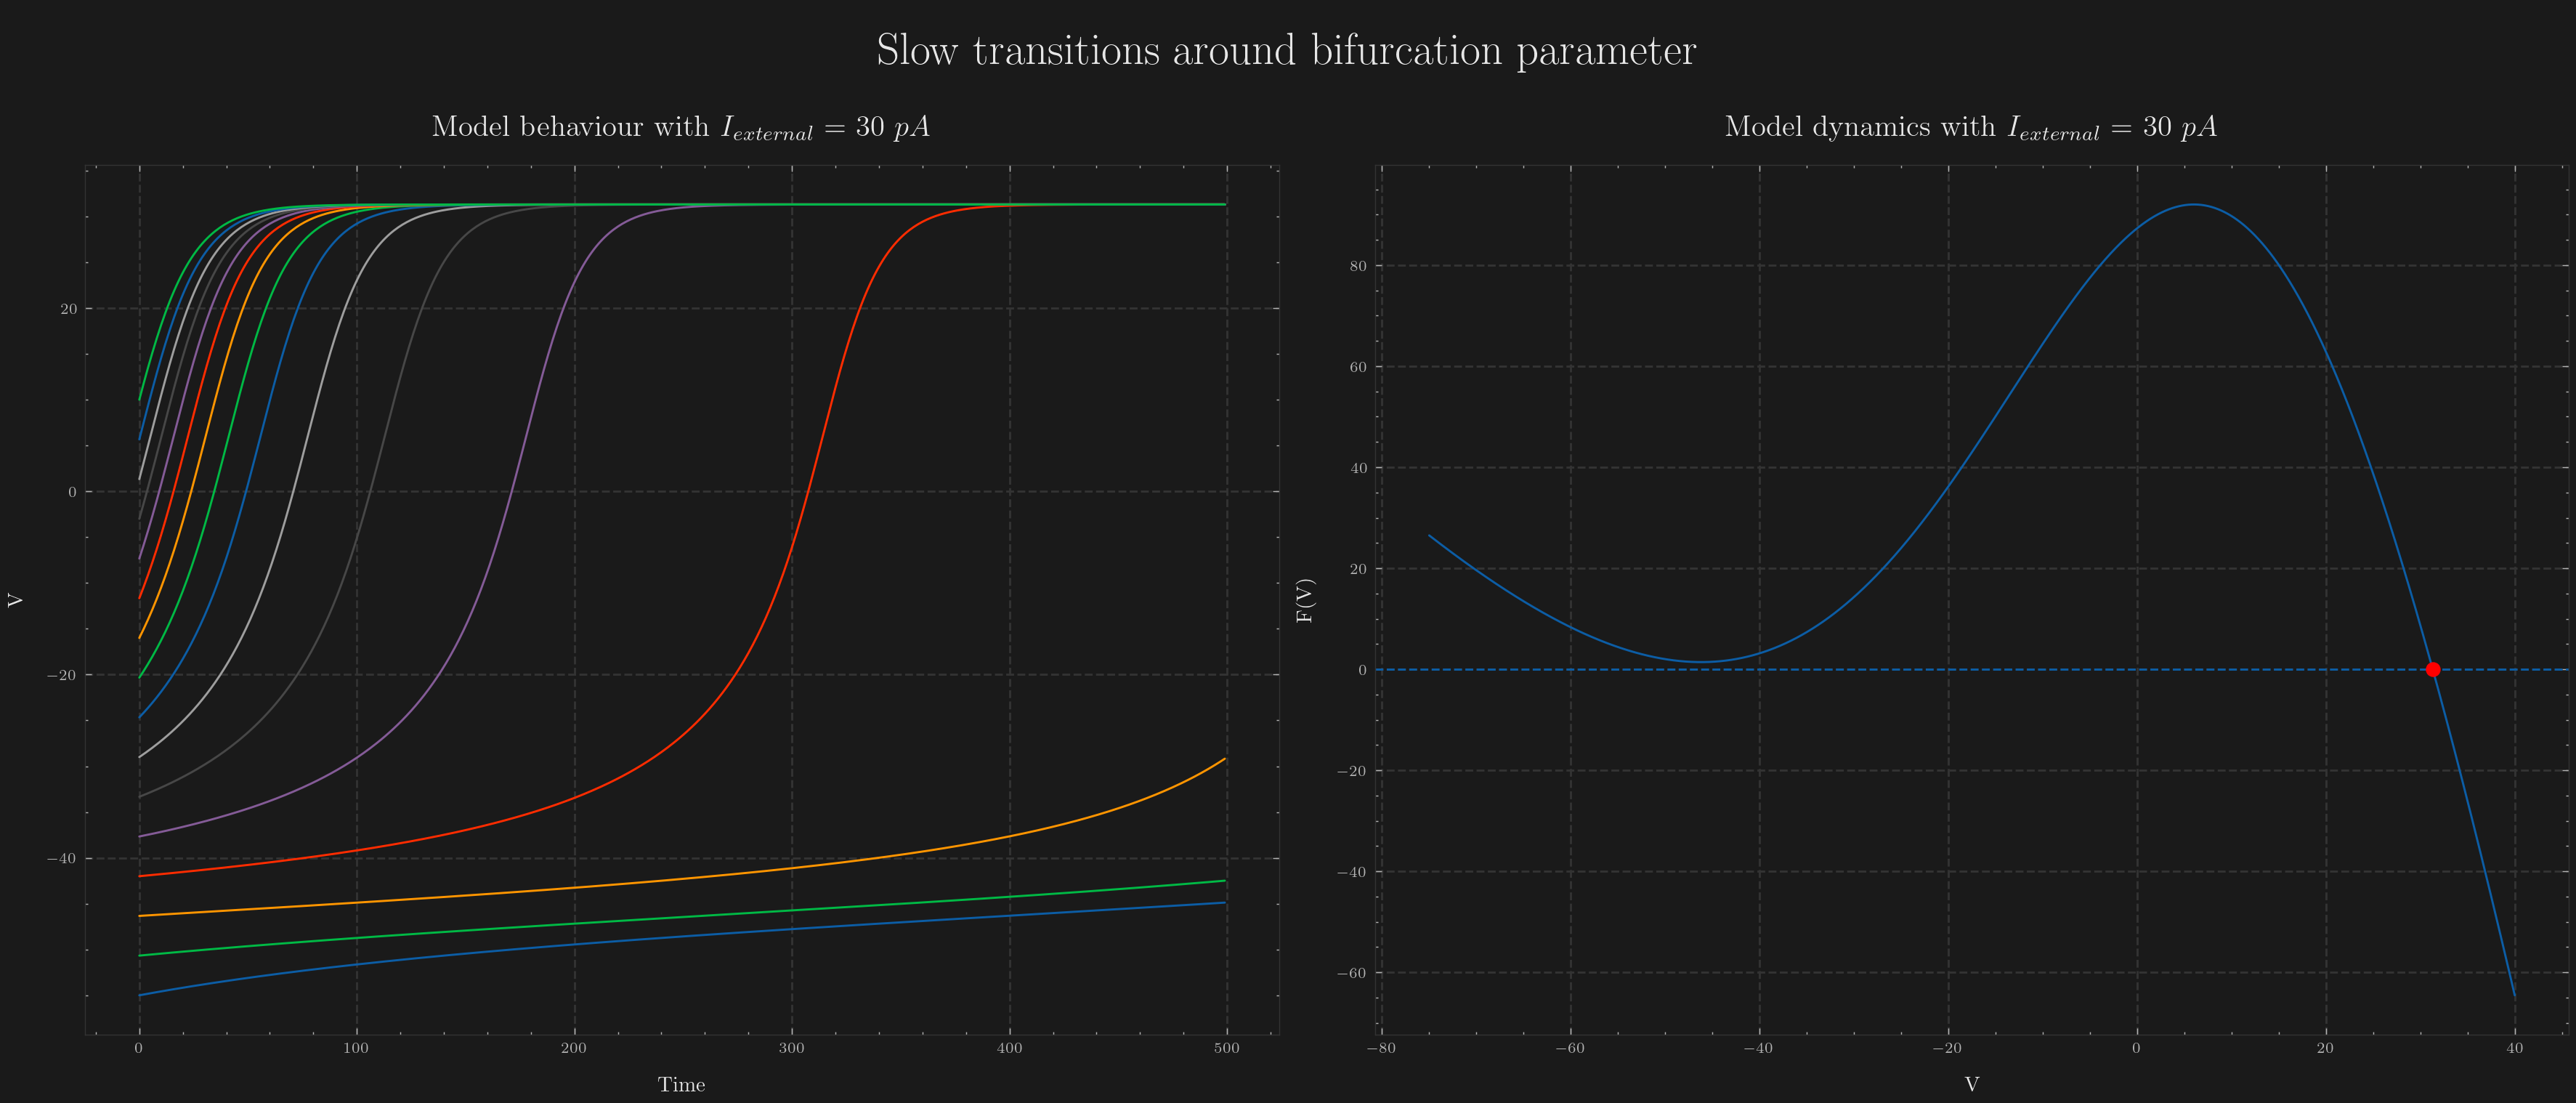

In [10]:
I_external = 30 #pA
V = np.linspace(-75, 40, 2000)

def dV3_dt(V, t, I_external):
    return I2(V, I_external)/C

initial_conditions3 = np.linspace(-55, 10, 16)
t = np.linspace(0, 5, 500)

fig3, ax3 = plt.subplots(1, 2, figsize=(17, 7), dpi = 210)

for V0 in initial_conditions3:
    V_t = odeint(dV3_dt, V0, t, args=(I_external,))
    ax3[0].plot(V_t, label=f'V(0) = {V0:.1f} mV')
ax3[0].set_title('Model behaviour with $I_{external}$ = 30 $pA$')
ax3[0].set_ylabel('V')
ax3[0].set_xlabel('Time')
    
ax3[1].plot(V, F2(V, I_external), label='dV/dt')
ax3[1].axhline(0, linestyle='--')
equilibrium_points = V[np.argwhere(np.abs(F2(V, I_external))<0.1).flatten()]
ax3[1].plot(equilibrium_points, np.zeros_like(equilibrium_points), 'ro')
ax3[1].set_title('Model dynamics with $I_{external}$ = 30 $pA$')
ax3[1].set_ylabel('F(V)')
ax3[1].set_xlabel('V')


plt.suptitle('Slow transitions around bifurcation parameter', fontsize=21, y = 1.01)
plt.figtext(0.5, 1.02, ' ', fontsize=10)
plt.tight_layout()
plt.show()


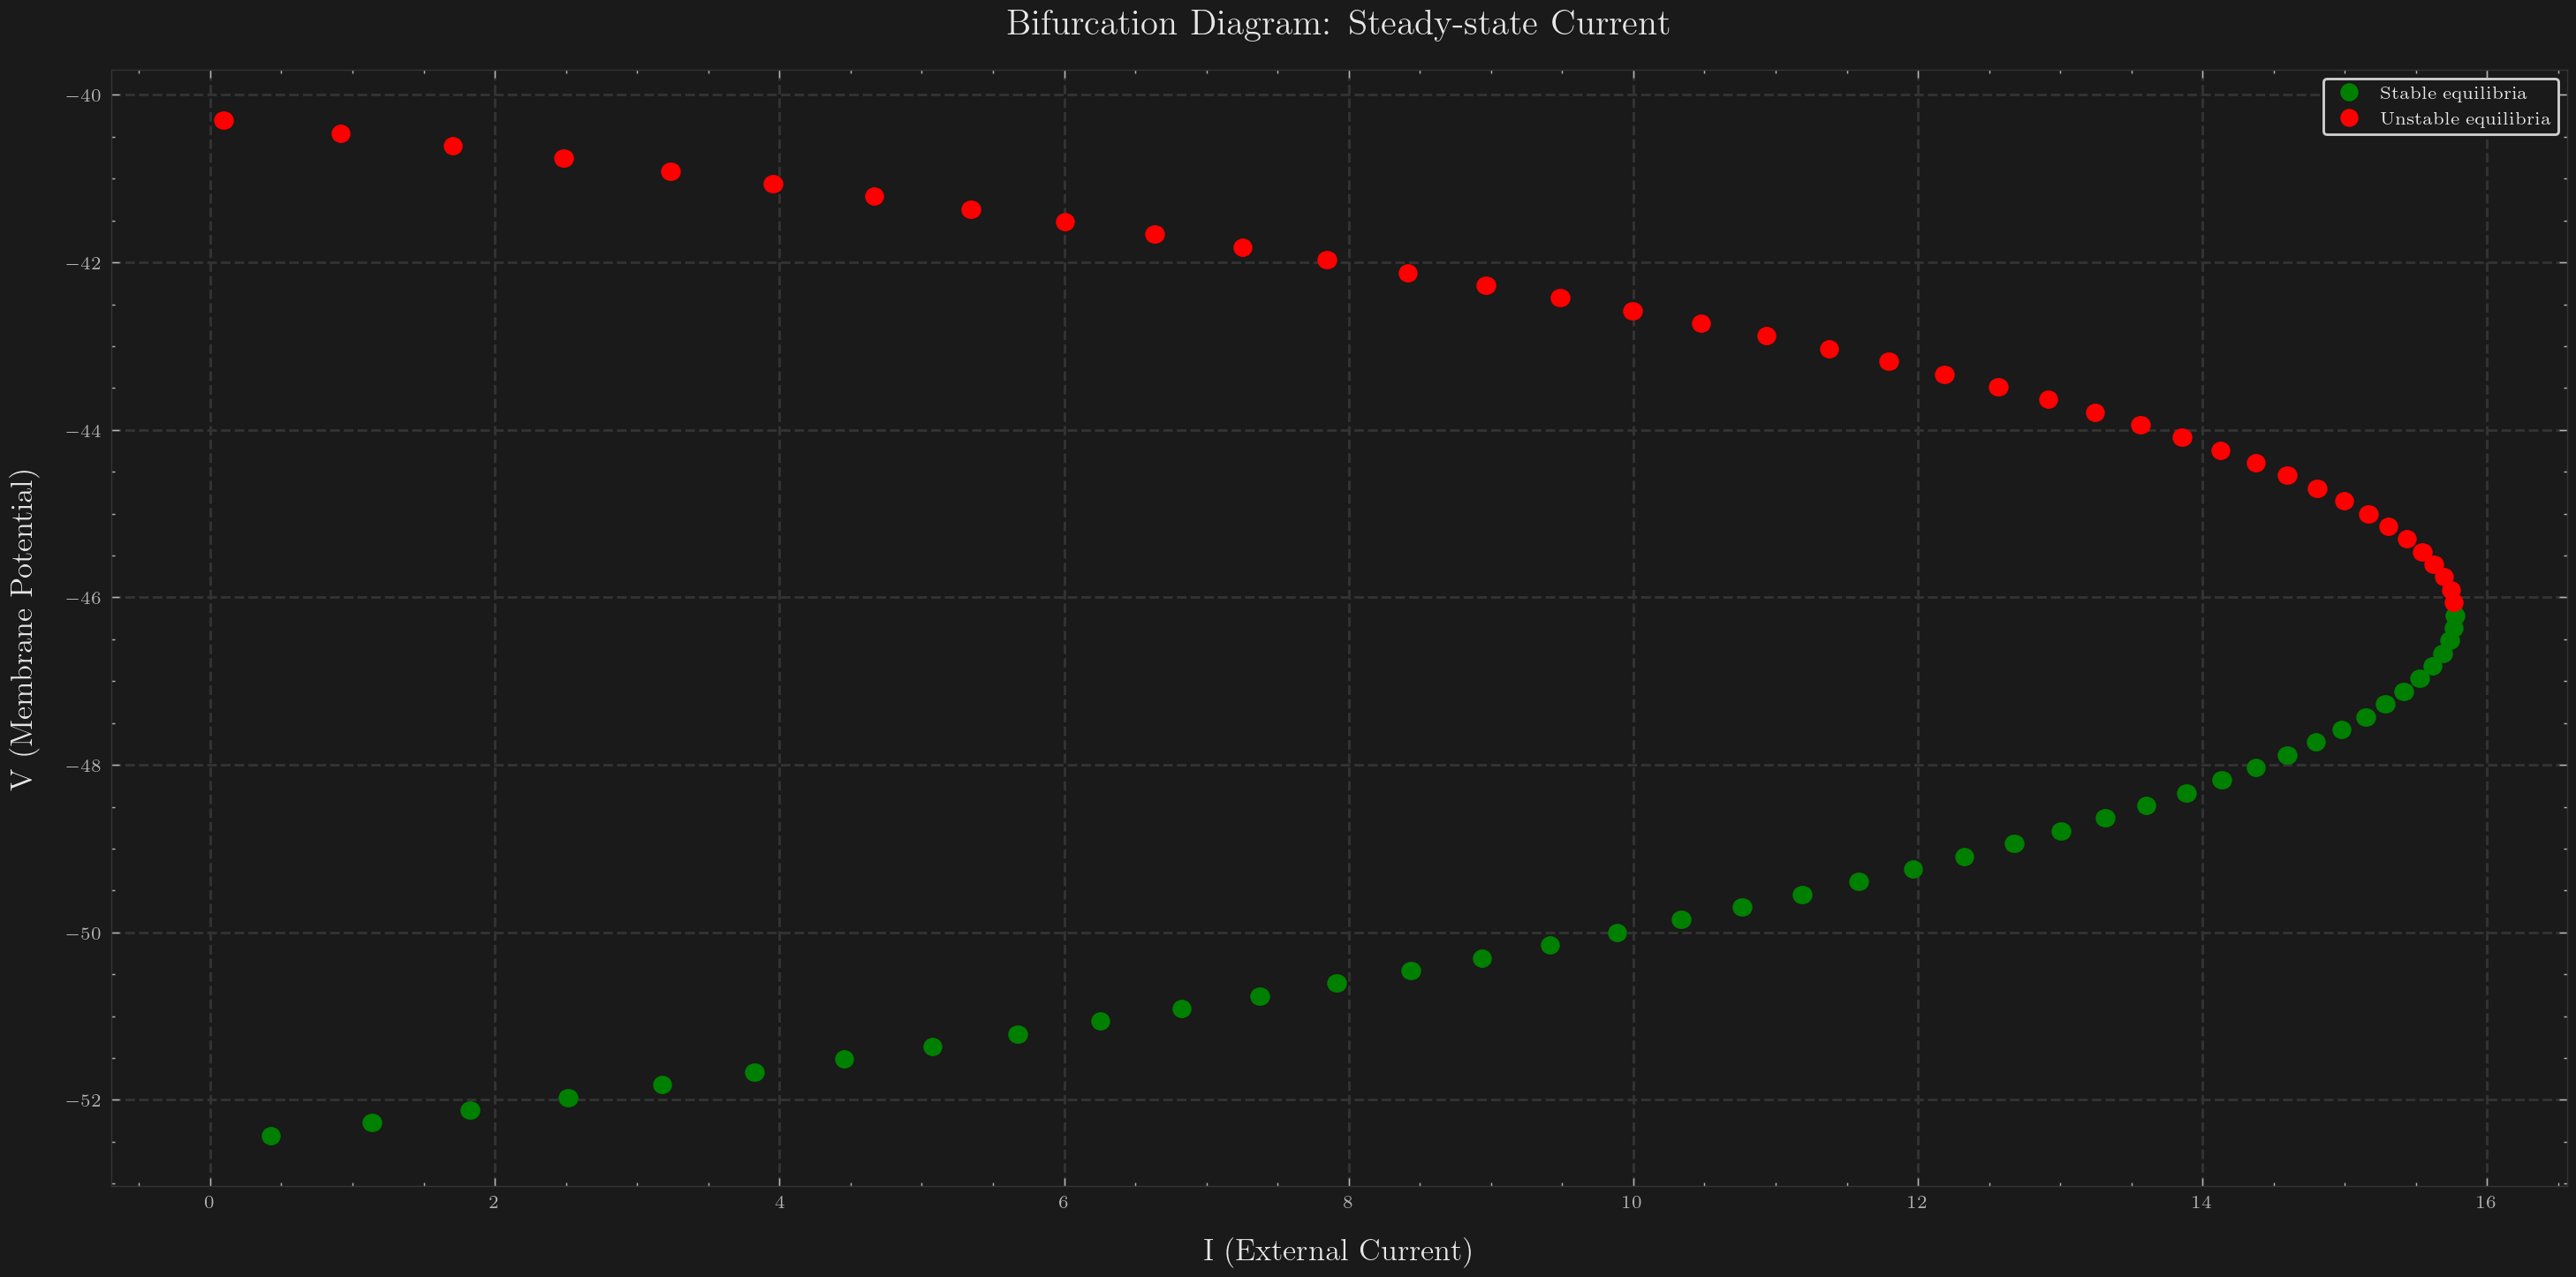

array([[ 4.20000000e-01, -5.24242424e+01, -1.14470997e-04],
       [ 4.30000000e-01, -5.24242424e+01,  8.85529003e-04],
       [ 1.13000000e+00, -5.22727273e+01, -3.29602679e-04],
       [ 1.14000000e+00, -5.22727273e+01,  6.70397321e-04],
       [ 1.82000000e+00, -5.21212121e+01, -9.79888008e-04],
       [ 1.83000000e+00, -5.21212121e+01,  2.01119921e-05],
       [ 2.51000000e+00, -5.19696970e+01, -5.60144039e-05],
       [ 2.52000000e+00, -5.19696970e+01,  9.43985596e-04],
       [ 3.17000000e+00, -5.18181818e+01, -5.48645811e-04],
       [ 3.18000000e+00, -5.18181818e+01,  4.51354189e-04],
       [ 3.82000000e+00, -5.16666667e+01, -4.48423233e-04],
       [ 3.83000000e+00, -5.16666667e+01,  5.51576767e-04],
       [ 4.45000000e+00, -5.15151515e+01, -7.45965284e-04],
       [ 4.46000000e+00, -5.15151515e+01,  2.54034716e-04],
       [ 5.07000000e+00, -5.13636364e+01, -4.31868750e-04],
       [ 5.08000000e+00, -5.13636364e+01,  5.68131250e-04],
       [ 5.67000000e+00, -5.12121212e+01

In [11]:
# bifurcation diagram
V = np.linspace(-55, -40, 100)

# defining the function F3 and its derivative
def F3(V, I_external):
    return I2(V, I_external)/C

def dF3(V):
    m_inf = boltzmann(V, V_half, k)
    m_der = 1 / k * m_inf * (1 - m_inf)
    term1 = g_Na*m_inf
    term2 = g_Na*(V - E_Na)*m_der
    return -(g_L + term1 + term2)

# lists to store equilibrium points
stable_equilibria = []
unstable_equilibria = []
threshold = None

# Loop over current values (bifurcation parameter)
for index in range(0, 2500, 1):
    current = index / 100.0  # Convert to float
    tolerance = 0.001

    # Find stable equilibria (where F3 < tolerance and dF3 < 0)
    stable_eqs = V[np.logical_and(np.abs(F3(V, current)) < tolerance, dF3(V) < 0)]
    for v in stable_eqs:
        stable_equilibria.append([current, v, F3(v, current)])

    # Find unstable equilibria (where F3 < tolerance and dF3 > 0)
    unstable_eqs = V[np.logical_and(np.abs(F3(V, current)) < tolerance, dF3(V) > 0)]
    for v in unstable_eqs:
        unstable_equilibria.append([current, v, F3(v, current)])

# convert lists to arrays for plotting
stable_equilibria = np.array(stable_equilibria)
unstable_equilibria = np.array(unstable_equilibria)

plt.figure(figsize=(14, 7), dpi = 210)
plt.plot(stable_equilibria[:, 0], stable_equilibria[:, 1], 'go', label='Stable equilibria')
plt.plot(unstable_equilibria[:, 0], unstable_equilibria[:, 1], 'ro', label='Unstable equilibria')
plt.xlabel('I (External Current)', fontsize=12)
plt.ylabel('V (Membrane Potential)', fontsize=12)
plt.title('Bifurcation Diagram: Steady-state Current', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

stable_equilibria

## quadratic integrate and fire model

The quadratic integrate and fire neuron has a quadratic term which results in a regenerative upstroke in membrane potential (the rate of increase increases with membrane potential). 

This corresponds to the regenerative activation of voltage-gated sodium channels in the neuron. The model is given by the following equation:
<br>
$$\tau \frac{dV}{dt} = I + V^{2}$$
<br>
where if $V \geq V_{\text{peak}}$ then neuron spikes and the membrane potential is reset to $V_{\text{reset}}$

This can be derived from 
<br>
$$ C\dot{V} = I - I_{\infty}(V)$$
<br>
where we can approximate the steady-state current as $I_{\infty}(V) = g_{L}(V - E_{L}) + k(V - V_{\text{th}})^{2}_{+}$

In [34]:
t = np.linspace(0, 10, 1000)


0.02002002002002002

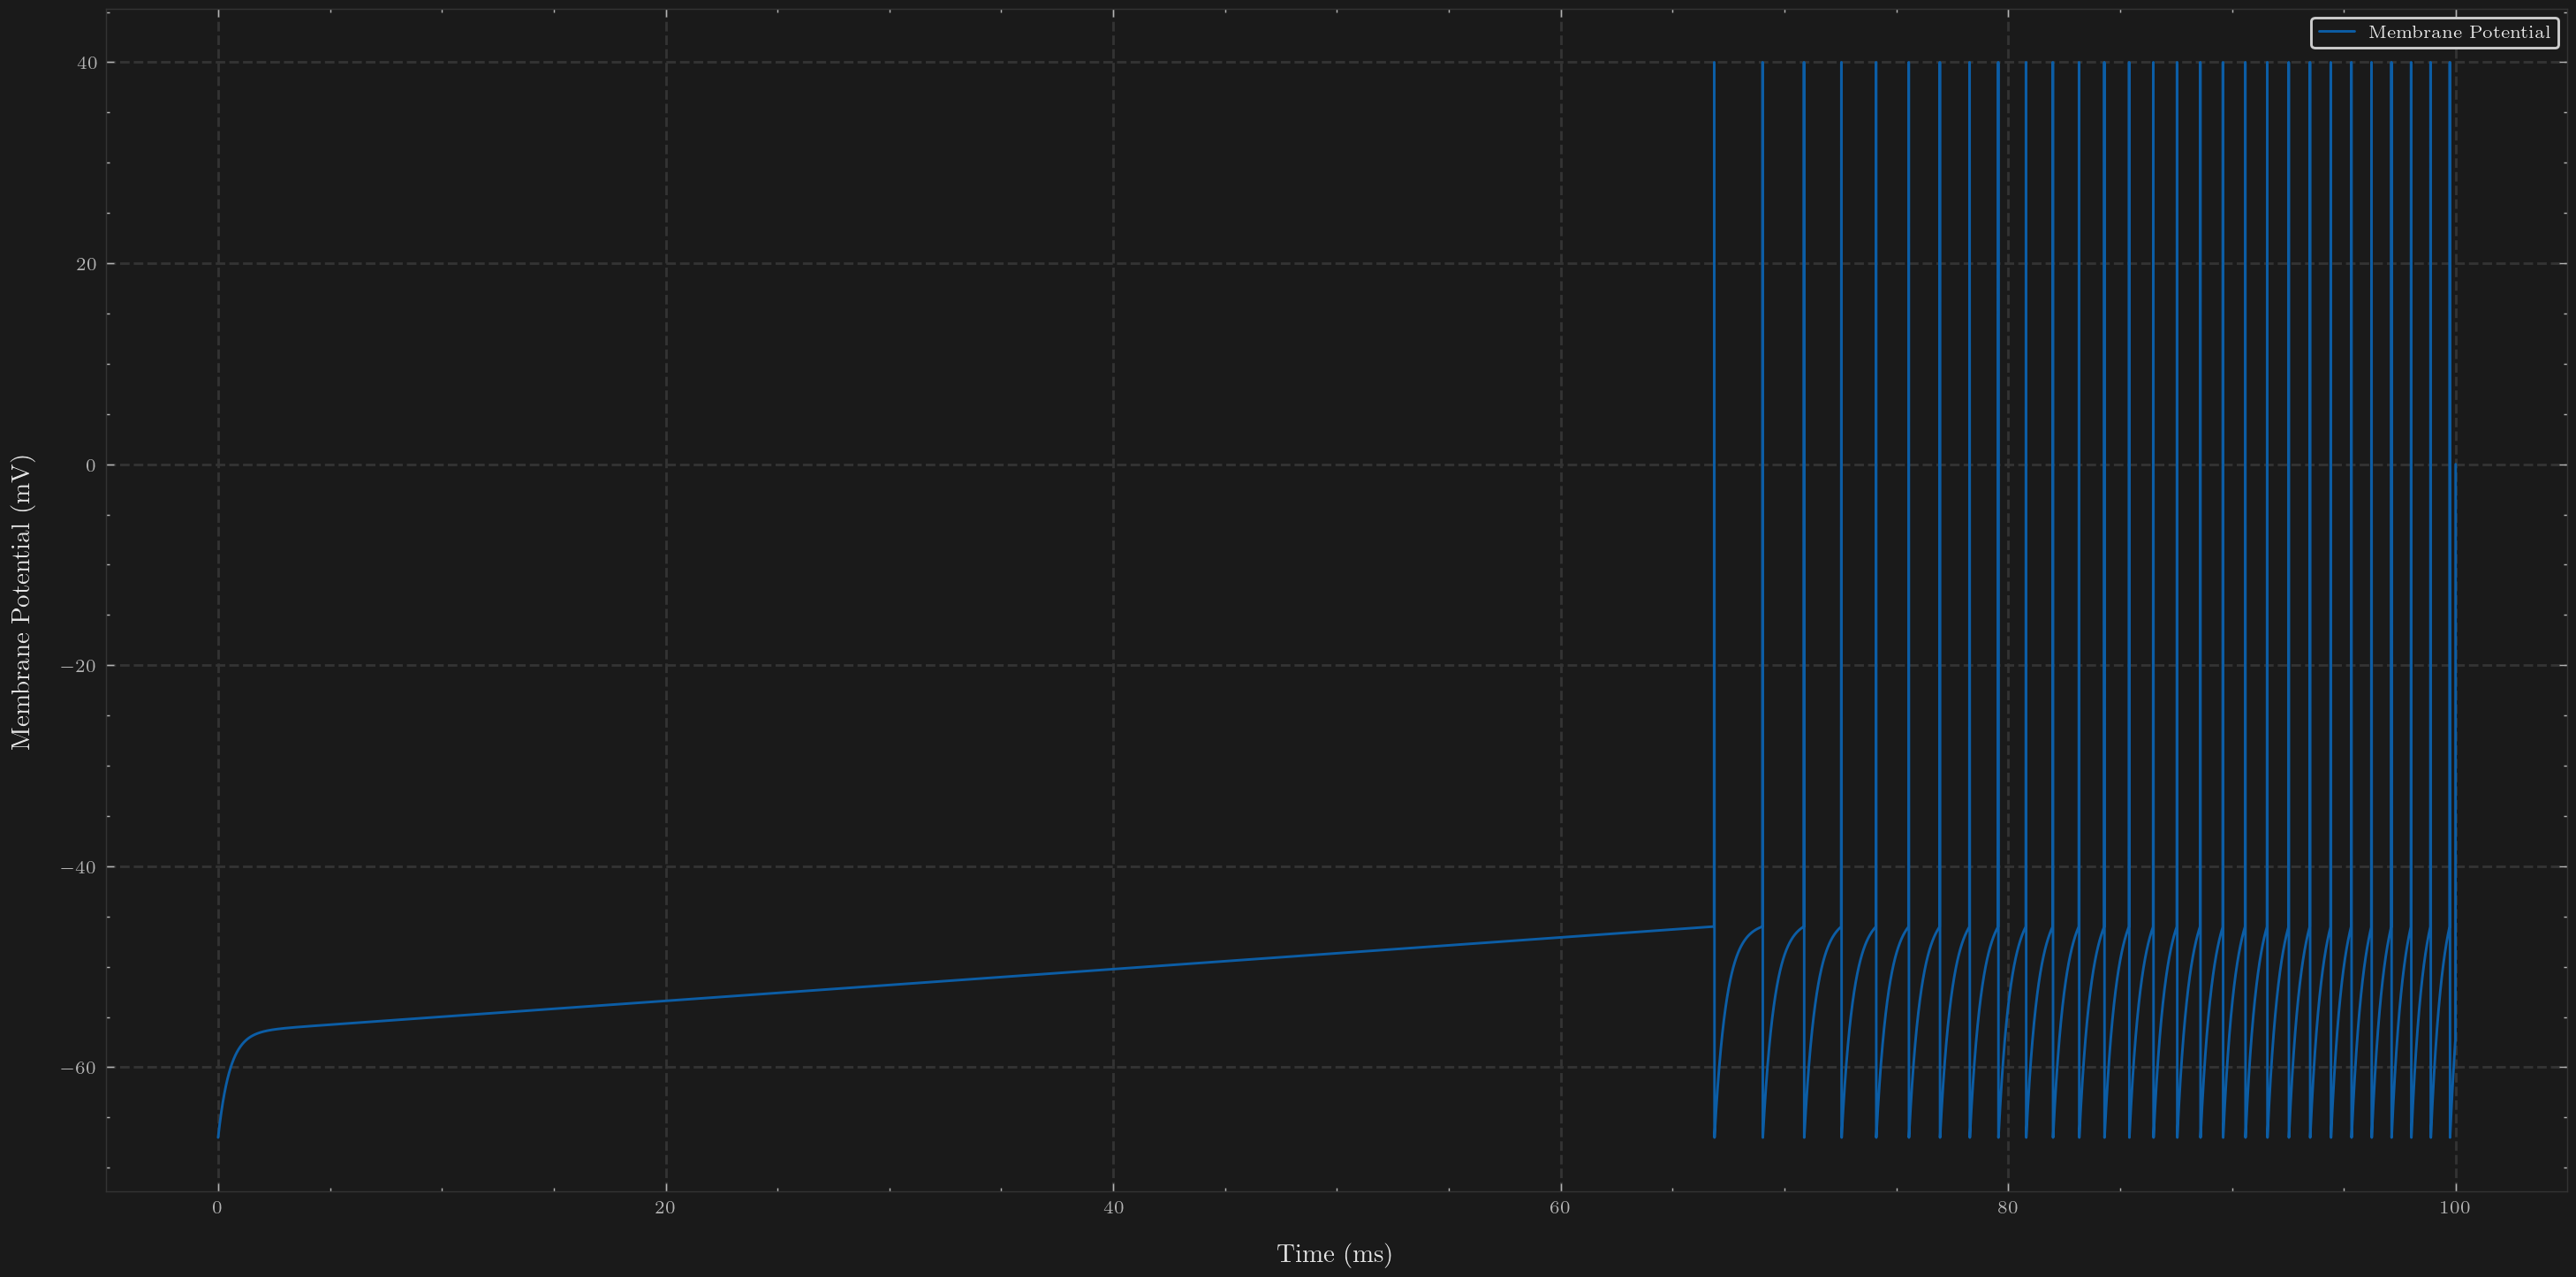

In [75]:
def I_inf(V, V_th, k):
    x = V - V_th if V > V_th else 0
    return g_L * (V - E_L) - k * (x)**2

def F4(V, I_input, V_th, k):
    return (I_input - I_inf(V, V_th, k)) / C

# Time vector
duration = 100
dt = 0.01
t = np.arange(0, duration, dt)

# Initialize membrane potential and current
V_t = np.zeros_like(t)
I = np.linspace(200, 500, len(t))

# Set initial conditions
V_t[0] = E_L  


V_th = -46  # Threshold voltage for spike
V_peak = 40  # Peak voltage during spike
V_reset = E_L  # Reset voltage after spike

# Iterate through time steps
for step in range(1, len(t) - 1):

    # Update membrane potential based on the differential equation
    V_t[step] = V_t[step - 1] + F4(V_t[step - 1], I[step - 1], V_th, k) * dt

    # Spike condition
    if V_t[step - 1] >= V_th:
        V_t[step - 1] = V_peak  # Spike to +40 mV
        V_t[step] = V_reset  # Reset membrane potential in the next time step

# Plotting the results
plt.figure(figsize=(14, 7), dpi=210)
plt.plot(t, V_t, label='Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.tight_layout()
plt.show()

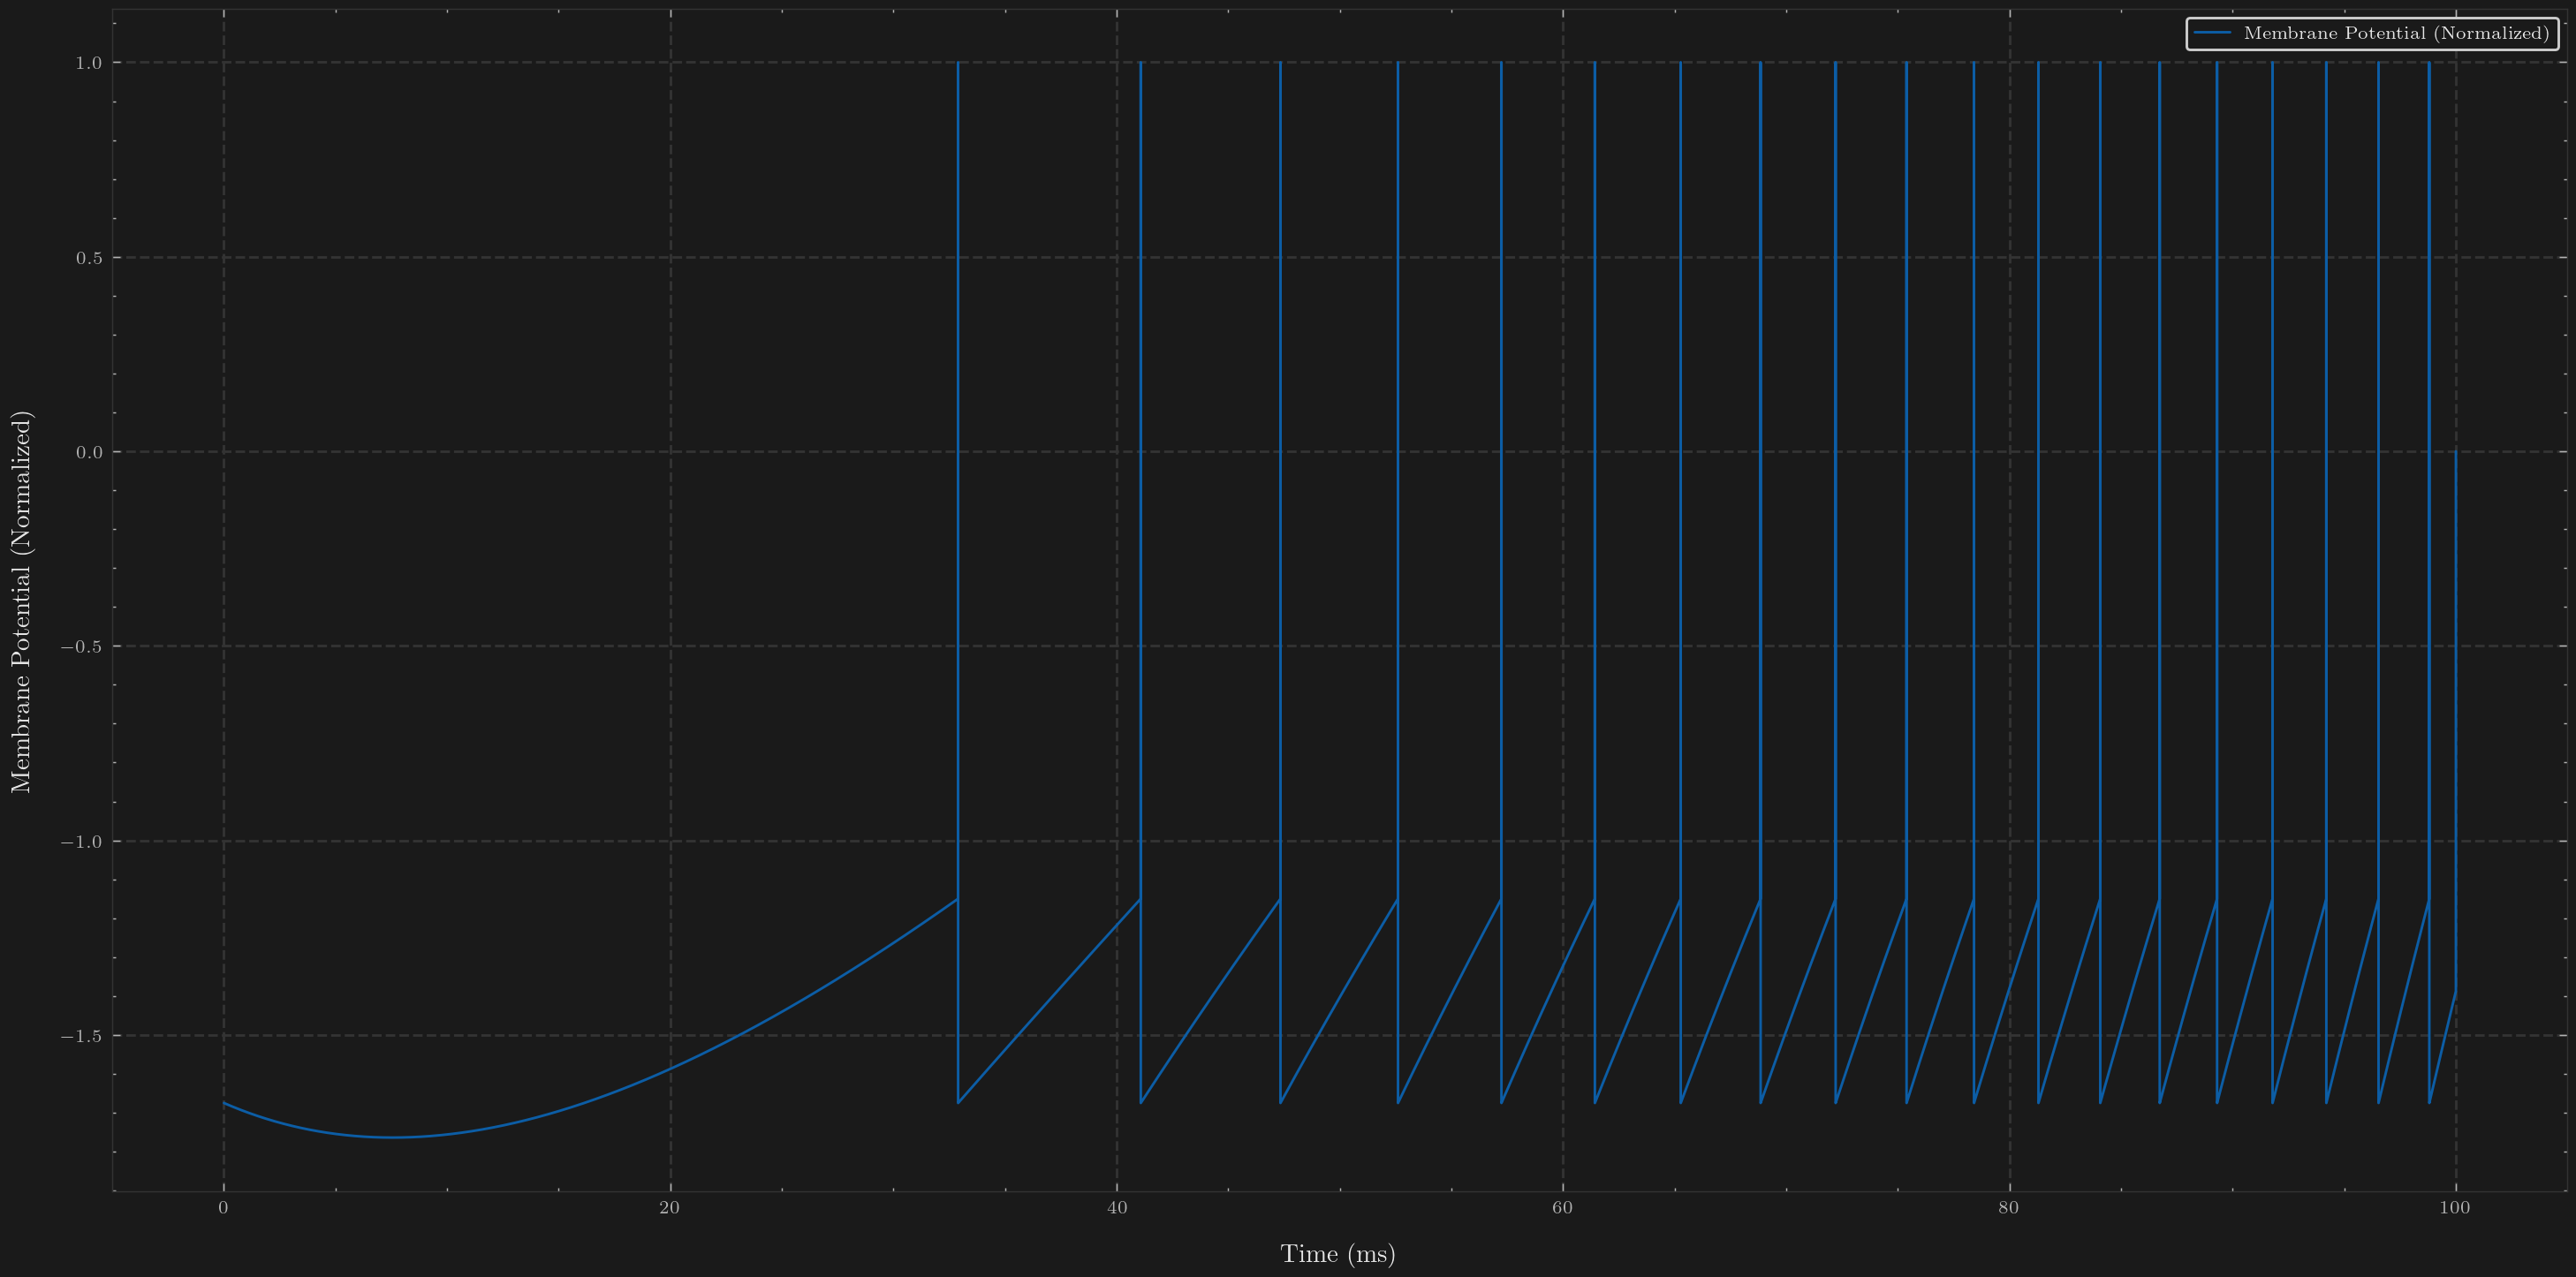

In [81]:
V_peak_original = 40  # Original peak voltage (mV)
V_th_original = -46   # Original threshold voltage (mV)

# Normalization factor (to normalize V_peak = 1)
V_scale = V_peak_original  # Normalizing to make peak voltage = 1

# Normalized parameters
g_L_norm = g_L / V_scale
E_L_norm = E_L / V_scale
V_th_norm = V_th_original / V_scale
V_peak_norm = V_peak_original / V_scale
k_norm = k / V_scale**2

# Normalized equations
def I_inf(V, V_th, k):
    x = V - V_th if V > V_th else 0
    return g_L_norm * (V - E_L_norm) - k * (x)**2

def F4(V, I_input, V_th, k):
    return (I_input - I_inf(V, V_th, k)) / C

# Time vector
duration = 100
dt = 0.001
t = np.arange(0, duration, dt)

# Initialize membrane potential and current (normalized)
V_t = np.zeros_like(t)
I = np.linspace(-10 / V_scale, 100 / V_scale, len(t))  # Normalizing current as well

# Set initial conditions (normalized)
V_t[0] = E_L_norm

V_th_norm = V_th_original / V_scale  # Normalized threshold voltage
V_reset_norm = E_L_norm  # Normalized reset voltage

# Iterate through time steps
for step in range(1, len(t) - 1):
    # Update membrane potential based on the normalized differential equation
    V_t[step] = V_t[step - 1] + F4(V_t[step - 1], I[step - 1], V_th_norm, k_norm) * dt

    # Spike condition (normalized)
    if V_t[step - 1] >= V_th_norm:
        V_t[step - 1] = V_peak_norm  # Normalized spike to 1
        V_t[step] = V_reset_norm  # Reset membrane potential in the next time step

# Plotting the results
plt.figure(figsize=(14, 7), dpi=210)
plt.plot(t, V_t, label='Membrane Potential (Normalized)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (Normalized)')
plt.legend()
plt.tight_layout()
plt.show()